<a href="https://colab.research.google.com/github/ailafelixa/EDA-Pharmaceutical-Sales/blob/main/Aila_Modelo_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando pacotes necessários



In [2]:
import pandas as pd
import numpy as np
!pip install dbfread
from dbfread import DBF
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
!pip install catboost
from catboost import CatBoostClassifier
import xgboost as xgb
!pip install category_encoders
import category_encoders as ce
from sklearn.cluster import KMeans
from category_encoders import MEstimateEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando os dados originais

In [4]:
path_all_data = '/content/drive/MyDrive/Graduação/Décimo semestre/TCC II/Raw data/filtered_df.csv'

In [5]:
df = pd.read_csv(path_all_data)

In [6]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
0,9,38,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,20171206,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
1,9,46,2,MG,SP,3524402,JACAREI ...,2,20171006,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
2,9,45,2,SP,SP,3548500,SANTOS ...,2,20190320,24,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1
3,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,20190212,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
4,5,67,2,SP,SP,3548500,SANTOS ...,1,20190702,31,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1


In [7]:
df.columns

Index(['ESCOLARI', 'IDADE', 'SEXO', 'UFNASC', 'UFRESID', 'IBGE', 'CIDADE',
       'CATEATEND', 'DTCONSULT', 'CLINICA', 'DIAGPREV', 'DTDIAG', 'BASEDIAG',
       'TOPO', 'TOPOGRUP', 'DESCTOPO', 'MORFO', 'DESCMORFO', 'EC', 'ECGRUP',
       'T', 'N', 'M', 'PT', 'PN', 'PM', 'S', 'G', 'LOCALTNM', 'IDMITOTIC',
       'PSA', 'GLEASON', 'OUTRACLA', 'META01', 'META02', 'META03', 'META04',
       'DTTRAT', 'NAOTRAT', 'TRATAMENTO', 'TRATHOSP', 'TRATFANTES',
       'TRATFAPOS', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO',
       'IMUNO', 'OUTROS', 'NENHUMANT', 'CIRURANT', 'RADIOANT', 'QUIMIOANT',
       'HORMOANT', 'TMOANT', 'IMUNOANT', 'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS',
       'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS',
       'OUTROAPOS', 'DTULTINFO', 'ULTINFO', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT',
       'ANODIAG', 'CICI', 'CICIGRUP', 'CICISUBGRU', 'FAIXAETAR', 'LATERALI',
       'INSTORIG', 'DRS', 'RRAS', 'PERDASEG', 'ERRO', 'DTRECIDIVA',
       'RECNENHUM'

In [8]:
df['TOPOGRUP'].value_counts()

C50    54217
Name: TOPOGRUP, dtype: int64

## Análise exploratória

O conjunto de dados tem 99 variáveis diferentes. Todas elas estão mapeadas nessa planilha: [Mapeamento das features - Dados Fundação Oncocentro de São Paulo](https://docs.google.com/spreadsheets/d/1L2r1G277d4B9qrjMEpRDFxbuflEYIOLojrDajy)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54217 entries, 0 to 54216
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESCOLARI    54217 non-null  int64 
 1   IDADE       54217 non-null  int64 
 2   SEXO        54217 non-null  int64 
 3   UFNASC      54217 non-null  object
 4   UFRESID     54217 non-null  object
 5   IBGE        54217 non-null  int64 
 6   CIDADE      54217 non-null  object
 7   CATEATEND   54217 non-null  int64 
 8   DTCONSULT   54217 non-null  int64 
 9   CLINICA     54217 non-null  int64 
 10  DIAGPREV    54217 non-null  int64 
 11  DTDIAG      54217 non-null  int64 
 12  BASEDIAG    54217 non-null  int64 
 13  TOPO        54217 non-null  object
 14  TOPOGRUP    54217 non-null  object
 15  DESCTOPO    54217 non-null  object
 16  MORFO       54217 non-null  int64 
 17  DESCMORFO   54217 non-null  object
 18  EC          54217 non-null  object
 19  ECGRUP      54217 non-null  object
 20  T     

#### Convertendo as colunas para os tipos corretos

Todas as colunas estão como tipo 'object'. Para facilitar a análise exploratória, vamos converte-las para os tipos corretos.

In [10]:
## Convertendo colunas numéricas
numeric_columns = []
for col in df.columns:
    try:
        pd.to_numeric(df[col], downcast='integer', errors='raise')
        numeric_columns.append(col)
    except (ValueError, TypeError):
        pass

df[numeric_columns] = df[numeric_columns].astype(int)

In [11]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
0,9,38,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,20171206,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
1,9,46,2,MG,SP,3524402,JACAREI ...,2,20171006,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
2,9,45,2,SP,SP,3548500,SANTOS ...,2,20190320,24,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1
3,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,20190212,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
4,5,67,2,SP,SP,3548500,SANTOS ...,1,20190702,31,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1


In [12]:
df.DTCONSULT.head()

0    20171206
1    20171006
2    20190320
3    20190212
4    20190702
Name: DTCONSULT, dtype: int64

In [13]:
df.DTDIAG.head()

0    20171122
1    20170914
2    20160602
3    20190115
4    20190702
Name: DTDIAG, dtype: int64

In [14]:
df.DTULTINFO.head()

0    10/04/2018
1    27/07/2022
2    09/05/2019
3    21/11/2019
4    13/08/2019
Name: DTULTINFO, dtype: object

In [15]:
## Convertendo datas; os valores com data tem strings (******) onde a data não está disponível, então é necessário antes converter isso para NA

date_columns = ['DTCONSULT', 'DTDIAG', 'DTULTINFO', 'DTRECIDIVA']
df[date_columns] = df[date_columns].replace('********', np.nan)

# A coluna 'DTULTINFO' tem uma formatação diferente de data
date_formats = {
    'DTCONSULT': '%Y%m%d',
    'DTDIAG': '%Y%m%d',
    'DTULTINFO': '%d/%m/%Y',
    'DTRECIDIVA': '%Y%m%d'
}

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format=date_formats[col])

In [16]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
0,9,38,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2017-12-06,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
1,9,46,2,MG,SP,3524402,JACAREI ...,2,2017-10-06,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
2,9,45,2,SP,SP,3548500,SANTOS ...,2,2019-03-20,24,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1
3,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2019-02-12,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
4,5,67,2,SP,SP,3548500,SANTOS ...,1,2019-07-02,31,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54217 entries, 0 to 54216
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ESCOLARI    54217 non-null  int64         
 1   IDADE       54217 non-null  int64         
 2   SEXO        54217 non-null  int64         
 3   UFNASC      54217 non-null  object        
 4   UFRESID     54217 non-null  object        
 5   IBGE        54217 non-null  int64         
 6   CIDADE      54217 non-null  object        
 7   CATEATEND   54217 non-null  int64         
 8   DTCONSULT   54217 non-null  datetime64[ns]
 9   CLINICA     54217 non-null  int64         
 10  DIAGPREV    54217 non-null  int64         
 11  DTDIAG      54217 non-null  datetime64[ns]
 12  BASEDIAG    54217 non-null  int64         
 13  TOPO        54217 non-null  object        
 14  TOPOGRUP    54217 non-null  object        
 15  DESCTOPO    54217 non-null  object        
 16  MORFO       54217 non-

### Quantidade de linhas, colunas e primeiros e últimos registros da tabela



In [18]:
len(df)

54217

Após a filtragem específica para câncer de mama, ficamos com 34.711 registros

In [19]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
0,9,38,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2017-12-06,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
1,9,46,2,MG,SP,3524402,JACAREI ...,2,2017-10-06,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
2,9,45,2,SP,SP,3548500,SANTOS ...,2,2019-03-20,24,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1
3,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2019-02-12,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
4,5,67,2,SP,SP,3548500,SANTOS ...,1,2019-07-02,31,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1


In [20]:
df.tail()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
54212,2,33,2,SP,SP,3513801,DIADEMA ...,2,2019-07-29,33,...,,,,3550308,97193,LINFOMA NASAL E TIPO NASAL DE CELULAS TNK ...,6,CACON ...,3,2
54213,3,65,2,SP,SP,3556453,VARGEM GRANDE PAULISTA ...,2,2018-12-17,15,...,C77,C42,C74,3550308,97193,LINFOMA NASAL E TIPO NASAL DE CELULAS TNK ...,6,CACON ...,3,2
54214,9,48,2,SP,SP,3554102,TAUBATE ...,2,2017-10-17,24,...,,,,3554102,97283,LINFOMA LINFOBLASTICO DE CELULAS PRECURSORAS B...,9,UNACON com Servios de Radioterapia e de Hemat...,1,1
54215,9,47,2,SP,SP,3524402,JACAREI ...,2,2017-12-18,33,...,,,,3524402,97401,MASTOCITOMA SOE ...,1,UNACON ...,1,1
54216,9,64,2,RN,SP,3518701,GUARUJA ...,2,2018-05-09,24,...,,,,3518701,97401,MASTOCITOMA SOE ...,1,UNACON ...,1,1


In [21]:
df.shape

(54217, 99)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54217 entries, 0 to 54216
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ESCOLARI    54217 non-null  int64         
 1   IDADE       54217 non-null  int64         
 2   SEXO        54217 non-null  int64         
 3   UFNASC      54217 non-null  object        
 4   UFRESID     54217 non-null  object        
 5   IBGE        54217 non-null  int64         
 6   CIDADE      54217 non-null  object        
 7   CATEATEND   54217 non-null  int64         
 8   DTCONSULT   54217 non-null  datetime64[ns]
 9   CLINICA     54217 non-null  int64         
 10  DIAGPREV    54217 non-null  int64         
 11  DTDIAG      54217 non-null  datetime64[ns]
 12  BASEDIAG    54217 non-null  int64         
 13  TOPO        54217 non-null  object        
 14  TOPOGRUP    54217 non-null  object        
 15  DESCTOPO    54217 non-null  object        
 16  MORFO       54217 non-

In [23]:
#Verificando se existem linhas duplicadas
df.duplicated().sum()

2

### Frequência da variável alvo

Como queremos predizer a recidiva, nossa label será a variável 'RECNENHUM', que infoma se o paciente teve recidiva (0) ou se não teve recidiva (1).

In [24]:
df['RECNENHUM'].value_counts()

1    48047
0     6170
Name: RECNENHUM, dtype: int64

Para facilitar a interpretação e deixar os casos positivos codificados como 1 e os negativos como zero, vamos criar uma nova coluna chamada 'REC'.

In [25]:
df['REC'] = df['RECNENHUM'].apply(lambda x: 1 if x == 0 else 0)

In [26]:
df['REC'].value_counts()

0    48047
1     6170
Name: REC, dtype: int64

In [27]:
df['N'].value_counts()

0        28598
1        14876
2         4621
X         1601
2A        1354
3         1254
3A         581
Y          488
3C         476
3B         192
2B         176
Name: N, dtype: int64

In [28]:
df['EC'].loc[df['REC']==1].value_counts()

IV       1565
IIIB     1176
IIIA     1010
IIB       780
IIA       697
IIIC      393
IA        306
0          95
X          68
Y          57
IB         23
Name: EC, dtype: int64

In [29]:
df['EC'].loc[df['REC']==0].value_counts()

IA       11344
IIA       9901
IIB       6139
IIIA      5110
0         4719
IV        3950
IIIB      3616
IIIC      1147
X          846
IB         844
Y          431
Name: EC, dtype: int64

<Figure size 1000x600 with 0 Axes>

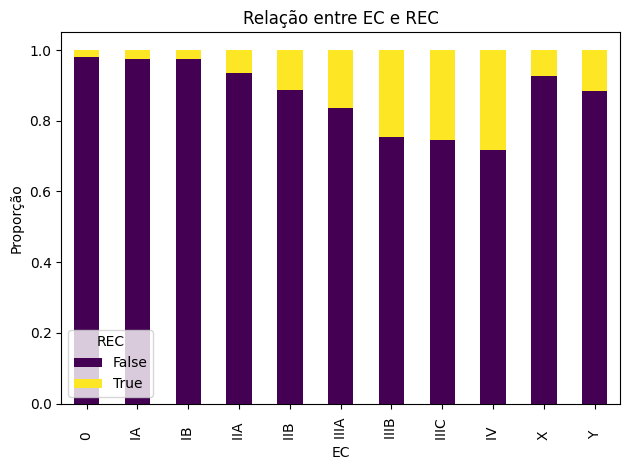

In [30]:
cross_tab = pd.crosstab(df['EC'], df['REC'], normalize='index')

plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('EC')
plt.ylabel('Proporção')
plt.title('Relação entre EC e REC')
plt.xticks(rotation=90)
plt.legend(title='REC', labels=['False', 'True'])
plt.tight_layout()
plt.show()

In [31]:
df['RECNENHUM'].value_counts(normalize=True)

1    0.886198
0    0.113802
Name: RECNENHUM, dtype: float64

Podemos ver que o dataset é altamente desbalanceado, com apenas cerca de 7% dos casos com recidiva e ~93% sem recidiva

Temos também as variáveis 'RECLOCAL', 'RECREGIO' e 'RECDIST' que informam se a recidiva foi local, regional ou a distância (metástase)

In [32]:
df['RECLOCAL'].value_counts()

0    52810
1     1407
Name: RECLOCAL, dtype: int64

In [33]:
df['RECREGIO'].value_counts()

0    53636
1      581
Name: RECREGIO, dtype: int64

In [34]:
df['RECDIST'].value_counts()

0    49108
1     5109
Name: RECDIST, dtype: int64

In [35]:
df['RECLOCAL'].loc[(df['RECDIST']==0) & (df['RECREGIO']==0)].value_counts()

0    48048
1      769
Name: RECLOCAL, dtype: int64

A frequência de recidiva regional é bastante baixa. A frequência de recidiva a distância compreende a maior parte dos casos.

#### Quantidade de dados por ano

In [36]:
df['ANODIAG'].value_counts()

2014    9719
2015    9225
2016    9059
2019    8820
2018    8797
2017    8597
Name: ANODIAG, dtype: int64

A maior parte dos registros é de 2019, seguido por 2019, 2020, 2021 e 2022, o último com apenas 3766 registros.

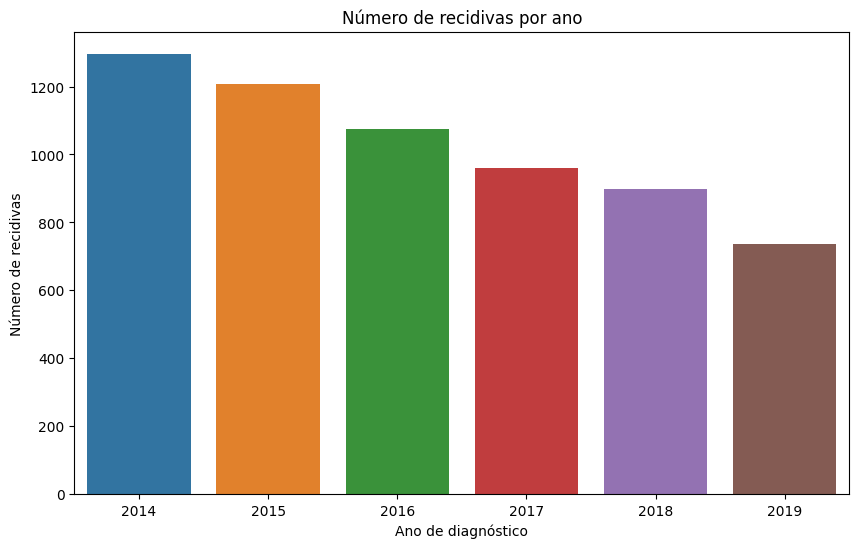

In [37]:
recurrence_counts = df.groupby('ANODIAG')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ANODIAG', y='REC', data=recurrence_counts)
plt.title('Número de recidivas por ano')
plt.xlabel('Ano de diagnóstico')
plt.ylabel('Número de recidivas')
plt.show()

A maior parte dos casos de recidiva que temos é de 2018. Isso porque, de acordo com a fundação oncocentro, os casos após 2018 ainda estão com registros em andamento.

#### Quantidade de topografias distintas

In [38]:
df['TOPO'].value_counts()

C504    15402
C508    12547
C509    11189
C502     3947
C501     3260
C505     2884
C503     2369
C500     2078
C506      541
Name: TOPO, dtype: int64

A topografia mais comum (8842 registros) é a C50.4, que se refere ao câncer de mama no quadrante superior externo da mama, seguido pelo C50.9 que se refere a glândula mamária. A topografia menos comum é a C50.6, onde o tumor se localiza no prolongamento axilar da mama

**C50 MAMA (exclui pele da mama C44.5)**

**C50.0 Mamilo**
Aréola

**C50.1 Porção central da mama**

**C50.2 Quadrante superior interno da mama**

**C50.3 Quadrante inferior interno da mama**

**C50.4 Quadrante superior externo da mama**

**C50.5 Quadrante inferior externo da mama**

**C50.6 Prolongamento axilar da mama**

**C50.8 Lesão sobreposta da mama**

Linha média da mama

Mama externa

Mama inferior

Mama interna

Mama superior

**C50.9 Mama, SOE (exclui pele da mama
C44.5)**
Glândula mamária

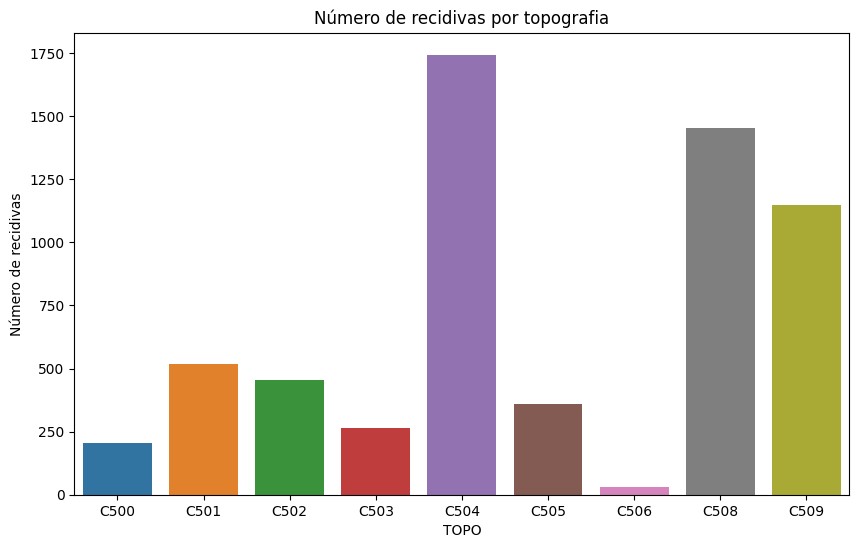

In [39]:
topo_recurrence_counts = df.groupby('TOPO')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='TOPO', y='REC', data=topo_recurrence_counts)
plt.title('Número de recidivas por topografia')
plt.xlabel('TOPO')
plt.ylabel('Número de recidivas')
plt.show()

A topografia C50.4 parece estar presente na maior parte dos casos de recidiva

### Distribuição de idade e sexo

#### Idade

<Axes: xlabel='IDADE', ylabel='Count'>

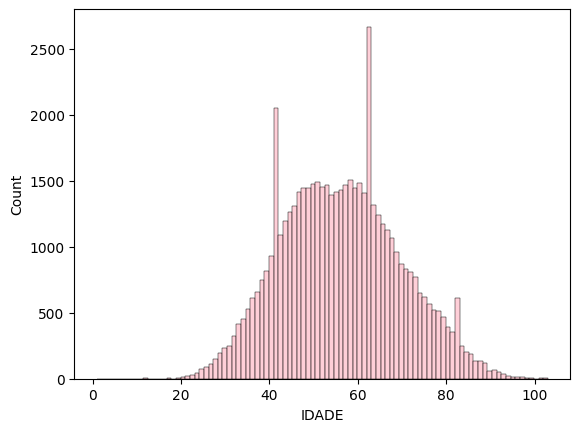

In [40]:
sns.histplot(x=df['IDADE'], color='pink')

A distribuição de idade parece seguir um padrão próximo a distribuição normal. Entretanto é relevante notar que existem alguns pontos em algumas faixas de idade onde a frequência é quase ou mais do que o dobro dos pontos ao redor. Um exemplo é o ponto ao redor dos 50 anos. Isso pode acontecer porque o screening obrigatório para câncer de mama começa aos 40 anos e as chances de câncer aumentam com a idade.

In [41]:
df['IDADE'].describe()

count    54217.000000
mean        56.270948
std         13.444375
min          1.000000
25%         46.000000
50%         56.000000
75%         66.000000
max        103.000000
Name: IDADE, dtype: float64

* A **média** de idade dos pacientes é de 56 anos, com um desvio padrão de 13 anos, ou seja, gira em torno de 43 a 69 anos.

* O **valor mínimo** é 1, o que pode ser um dado inserido incorretamente ou um caso de câncer infantil.

* A **idade máxima** foi 102 anos.

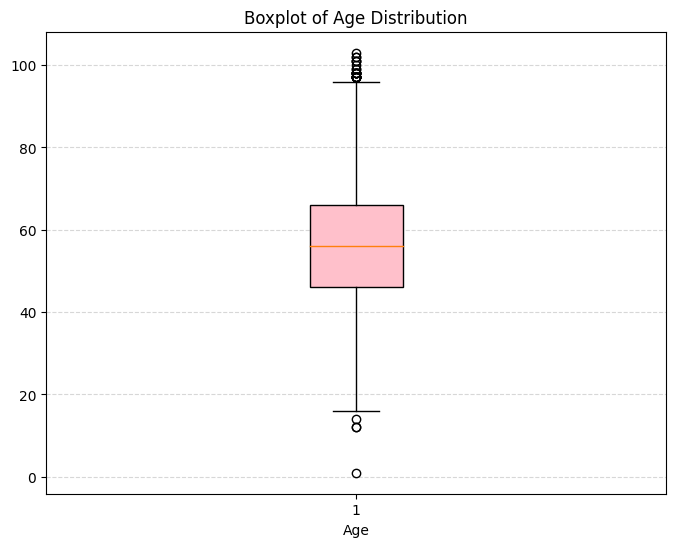

In [42]:
plt.figure(figsize=(8, 6))
bp = plt.boxplot(df['IDADE'], patch_artist=True)

for box in bp['boxes']:
    box.set(facecolor='pink')

plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.5)

plt.xlabel('Age')
plt.ylabel('')
plt.title('Boxplot of Age Distribution')

plt.show()

No boxplot é possível observar as informações descritas e que existem alguns outliers em idades < 20 e > 90, aproximadamente.

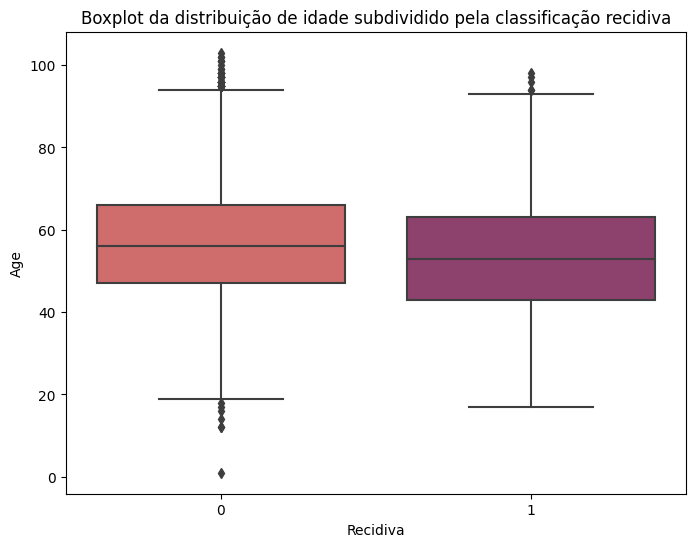

In [43]:
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x='REC', y='IDADE', data=df, palette="flare")

# Add labels and title
plt.xlabel('Recidiva')
plt.ylabel('Age')
plt.title('Boxplot da distribuição de idade subdividido pela classificação recidiva')

# Show the plot
plt.show()

Pacientes que tiveram recidiva possuem a faixa de idade parecida, apesar de levemente inferior, a dos pacientes  que não tiveram recidiva

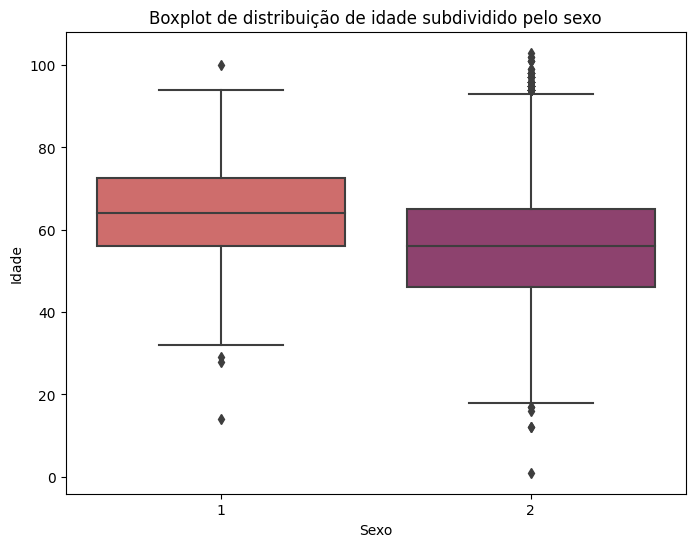

In [44]:
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x='SEXO', y='IDADE', data=df, palette="flare")

# Add labels and title
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.title('Boxplot de distribuição de idade subdividido pelo sexo')

# Show the plot
plt.show()

A idade parece ser similar entre os diferentes subtipos tumorais e os diferentes anos de diagnóstico incluidos. Comparando a distribuição de idade entre câncer de mama feminino e masculino, é possível ver que o câncer de mama masculino (1) em geral se manifesta em uma idade mais elevada.

#### Sexo

In [45]:
df['SEXO'] = df['SEXO'].astype(int)

In [46]:
df['SEXO'].value_counts()

2    53842
1      375
Name: SEXO, dtype: int64

Como esperado, a frequência para casos de câncer de mama no sexo feminino corresponde a maioria dos dados.

In [47]:
proporcao_recidiva_feminina = (df[(df['SEXO'] == 2) & (df['REC'] == 1)].shape[0] / df[df['SEXO'] == 2].shape[0])*100
print(f"A proporção de pacientes femininas com recidiva é: {proporcao_recidiva_feminina:.2f}%")

A proporção de pacientes femininas com recidiva é: 11.39%


In [48]:
proporcao_recidiva_masculina = (df[(df['SEXO'] == 1) & (df['REC'] == 1)].shape[0] / df[df['SEXO'] == 1].shape[0])*100
print(f"A proporção de pacientes masculinos com recidiva é: {proporcao_recidiva_masculina:.2f}%")

A proporção de pacientes masculinos com recidiva é: 9.87%


A frequêcia de recidiva nesse caso também é proporcionalmente maior na população feminina do que na população masculina

### Categoria de atendimento

1 - CONVENIO

2 - SUS

3 – PARTICULAR

9 – SEM INFORMAÇÃO

In [49]:
df['CATEATEND'] = df['CATEATEND'].astype(int)

In [50]:
df['CATEATEND'].value_counts()

2    44051
1     9583
3      583
Name: CATEATEND, dtype: int64

A grande maioria dos pacientes do banco de dados foram atendidos pelo SUS.

20% dos registros são de pacientes com convênio e menos de 1% são de pacientes com atendimento ao diagnóstico particular

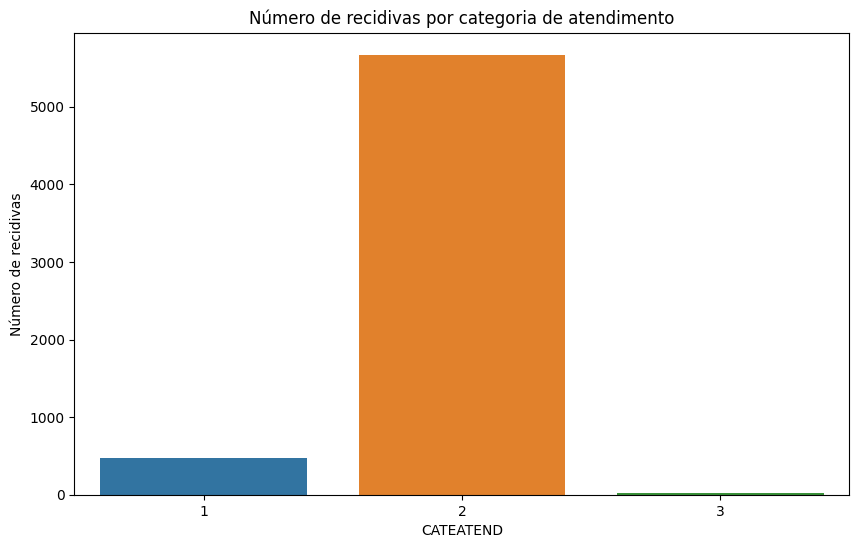

In [51]:
cateatend_recurrence_counts = df.groupby('CATEATEND')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CATEATEND', y='REC', data=cateatend_recurrence_counts)
plt.title('Número de recidivas por categoria de atendimento')
plt.xlabel('CATEATEND')
plt.ylabel('Número de recidivas')
plt.show()

In [52]:
proporcao_recidiva_sus = (df[(df['CATEATEND'] == 2) & (df['REC'] == 1)].shape[0] / df[df['CATEATEND'] == 2].shape[0])*100
print(f"Proporção de recidiva em pacientes SUS: {proporcao_recidiva_sus:.2f}%")

Proporção de recidiva em pacientes SUS: 12.87%


In [53]:
proporcao_recidiva_convenio = (df[(df['CATEATEND'] == 1) & (df['REC'] == 1)].shape[0] / df[df['CATEATEND'] == 1].shape[0])*100
print(f"Proporção de recidiva em pacientes Convenio: {proporcao_recidiva_convenio:.2f}%")

Proporção de recidiva em pacientes Convenio: 4.97%


In [54]:
proporcao_recidiva_particular = (df[(df['CATEATEND'] == 3) & (df['REC'] == 1)].shape[0] / df[df['CATEATEND'] == 3].shape[0])*100
print(f"Proporção de recidiva em pacientes Particular: {proporcao_recidiva_particular:.2f}%")

Proporção de recidiva em pacientes Particular: 3.95%


Como a maior parte dos dados do dataset são de pacientes SUS, a maior parte das recidivas também são representadas por esses pacientes.

### Escolaridade

1 – ANALFABETO

2 – ENS. FUND. INCOMPLETO

3 – ENS. FUND. COMPLETO

4 – ENSINO MÉDIO

5 – SUPERIOR

9 – IGNORADA

In [55]:
df['ESCOLARI'].value_counts()

2    13151
4    11311
9    11012
3     9686
5     7542
1     1515
Name: ESCOLARI, dtype: int64

A maior parte dos pacientes tem apenas Ensino Médio ou escolaridade ignorada. Pacientes que possuem apenas ensino fundamental completo ou que são analfabetos estão em menor quantidade no conjunto de dados.

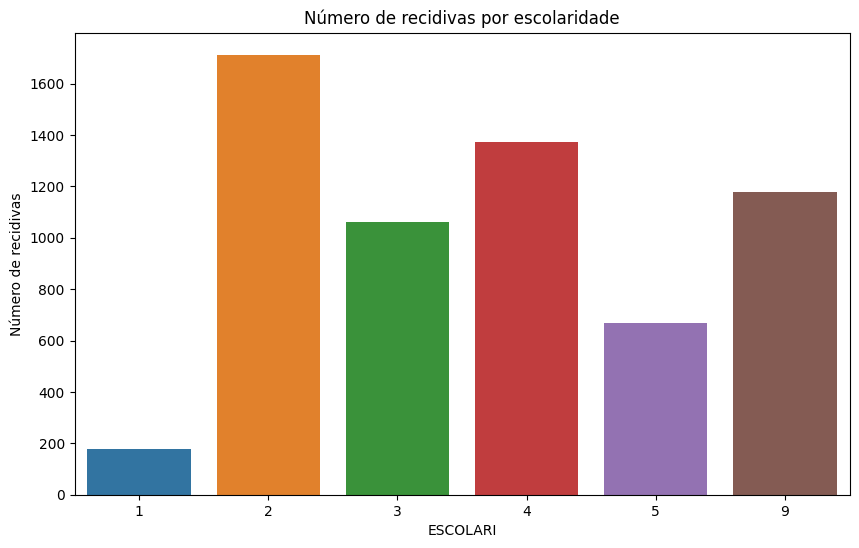

In [56]:
escolaridade_recurrence_counts = df.groupby('ESCOLARI')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ESCOLARI', y='REC', data=escolaridade_recurrence_counts)
plt.title('Número de recidivas por escolaridade')
plt.xlabel('ESCOLARI')
plt.ylabel('Número de recidivas')
plt.show()

In [57]:
proporcao_recidiva_1 = (df[(df['ESCOLARI'] == 1) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 1].shape[0])*100
print(f"Proporção de recidiva em pacientes analfabetos: {proporcao_recidiva_1:.2f}%")

Proporção de recidiva em pacientes analfabetos: 11.82%


In [58]:
proporcao_recidiva_2 = (df[(df['ESCOLARI'] == 2) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 2].shape[0])*100
print(f"Proporção de recidiva em pacientes fund. incompleto: {proporcao_recidiva_2:.2f}%")

Proporção de recidiva em pacientes fund. incompleto: 13.03%


In [59]:
proporcao_recidiva_3 = (df[(df['ESCOLARI'] == 3) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 3].shape[0])*100
print(f"Proporção de recidiva em pacientes fund. completo: {proporcao_recidiva_3:.2f}%")

Proporção de recidiva em pacientes fund. completo: 10.94%


In [60]:
proporcao_recidiva_4 = (df[(df['ESCOLARI'] == 4) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 4].shape[0])*100
print(f"Proporção de recidiva em pacientes com ensino médio: {proporcao_recidiva_4:.2f}%")

Proporção de recidiva em pacientes com ensino médio: 12.13%


In [61]:
proporcao_recidiva_5 = (df[(df['ESCOLARI'] == 5) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 5].shape[0])*100
print(f"Proporção de recidiva em pacientes com ensino superior: {proporcao_recidiva_5:.2f}%")

Proporção de recidiva em pacientes com ensino superior: 8.86%


In [62]:
proporcao_recidiva_9 = (df[(df['ESCOLARI'] == 9) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 9].shape[0])*100
print(f"Proporção de recidiva em pacientes com escolaridade ignorada: {proporcao_recidiva_9:.2f}%")

Proporção de recidiva em pacientes com escolaridade ignorada: 10.70%


A maior proporção de recidivas parece acontecer em pacientes analfabetos e com ensino fundamentos incompleto. Isso pode estar associado a condições de renda e acesso a saúde que podem ser fatores de risco em relação ao câncer

### Como os tipos de estadiamento se relacionam com a variável alvo?

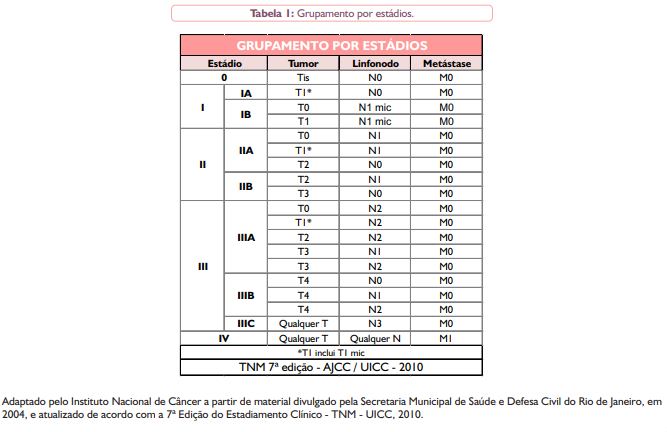

In [63]:
df.ECGRUP.value_counts()

II     17517
I      12517
III    12452
IV      5515
0       4814
X        914
Y        488
Name: ECGRUP, dtype: int64

A maior parte dos pacientes está no estadiamente IA, onde existe um carcinoma in situ mas não existe metástase para linfonodos regionais ou a distância.

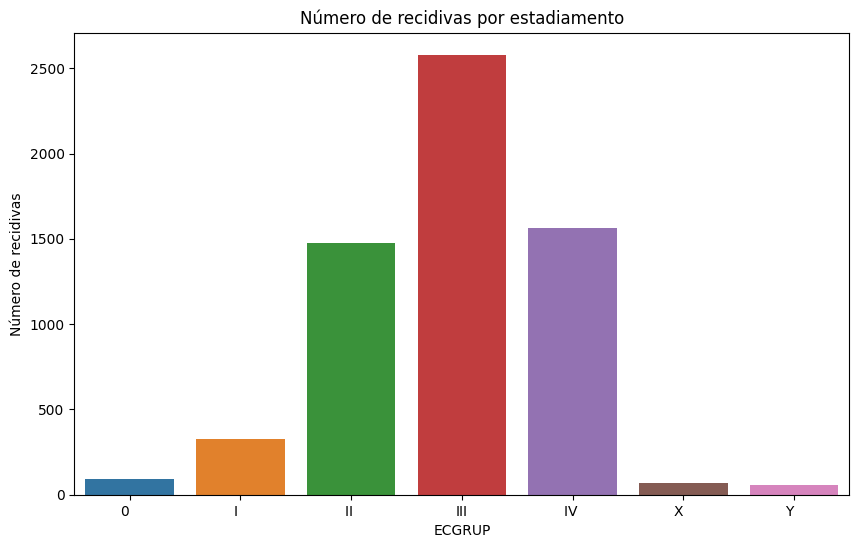

In [64]:
estadiamento_recurrence_counts = df.groupby('ECGRUP')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ECGRUP', y='REC', data=estadiamento_recurrence_counts)
plt.title('Número de recidivas por estadiamento')
plt.xlabel('ECGRUP')
plt.ylabel('Número de recidivas')
plt.show()

A maior parte dos pacientes que tiveram recidiva tinham tumores nos grupos de estadiamento III e IV.

### RRAS

As RRAS são as Redes Regionais de Atenção à Saúde do Estado de São Paulo e servem para organizar o cuidado ao câncer no Estado. Ao todo existem 17 RRAS, sendo que a maior parte dos serviços oncológicos se localizam na cidade de São Paulo (RRAS06).

In [65]:
df['RRAS'].value_counts()

6     16179
13     4557
12     4115
15     3725
99     3085
9      2873
1      2684
2      2443
5      1948
8      1939
10     1828
14     1792
7      1740
17     1552
16     1408
4      1105
11      883
3       361
Name: RRAS, dtype: int64

De fato, a maior parte dos registros se localiza na RRAS 06 que compreende o município de São Paulo, seguida pela RRAS 12 que compreende as regiões de Araçatuba e São José do Rio Preto.

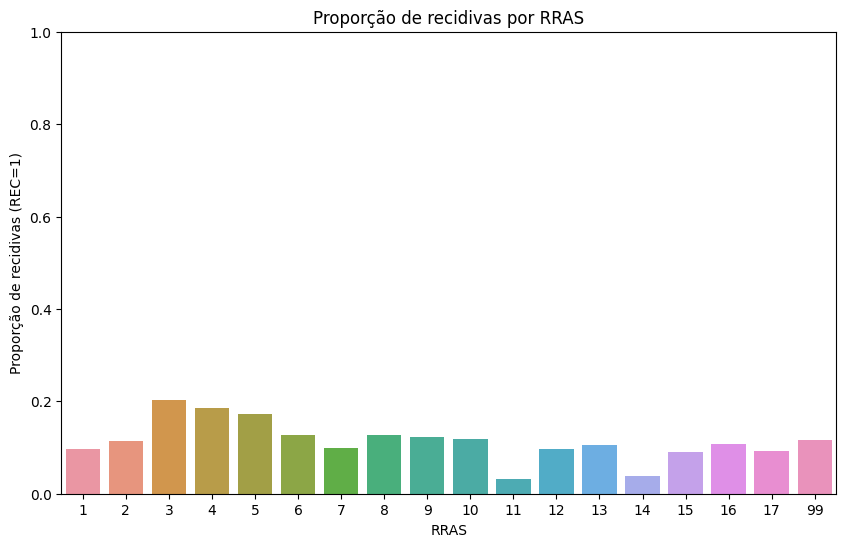

In [66]:
rras_recurrence_counts = df.groupby('RRAS')['REC'].mean().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='RRAS', y='REC', data=rras_recurrence_counts)
plt.title('Proporção de recidivas por RRAS')
plt.xlabel('RRAS')
plt.ylabel('Proporção de recidivas (REC=1)')
plt.ylim(0, 1)  # Define o limite do eixo Y para valores entre 0 e 1
plt.show()

A média de recidivas é maior na RRAS 3, 4 e 5. É interessante salientar que até outubro de 2020 a RRAS 03
e a RRAS 05, que é a região de saúde de Franco da Rocha e da rota dos bandeirantes, respectivamente, não possuiam nenhum serviço oncológico, o que ressalta a desigualdade de acesso a saúde no Estado de São Paulo. Já a RRAS04, que compreende 8 municípios da região de saúde 'Mananciais' possuia apenas 2 serviços oncológicos até 2020.

Fontes: [Termo de Referência para a estruturação de Redes Regionais de Atenção à Saúde no Estado de São Paulo](http://saude.sp.gov.br/resources/ses/perfil/gestor/homepage/redes-regionais-de-atencao-a-saude-no-estado-de-sao-paulo/redes-regionais-de-atencao-a-saude-rras/termo_de_referencia_redes_regionais.pdf)

[PLANO DE ATENÇÃO ONCOLÓGICA
DO ESTADO DE SÃO PAULO](https://www.saude.sp.gov.br/resources/ses/perfil/gestor/documentos-de-planejamento-em-saude/plano_estadual_de_oncologia_do_estado_de_sao_paulo-2020.pdf)

### Qual o período médio entre o diagnóstico e a recidiva

In [67]:
df['DTRECIDIVA'].value_counts()

2018-08-01    13
2018-01-15    11
2020-03-16    11
2021-02-02    11
2019-08-16    10
              ..
2018-11-11     1
2016-03-30     1
2014-04-22     1
2015-07-06     1
2022-06-07     1
Name: DTRECIDIVA, Length: 2161, dtype: int64

In [68]:
df['DATEDIFF_DIAG_REC'] = np.where(df['RECNENHUM'] == 0, (df['DTRECIDIVA'] - df['DTDIAG']).dt.days, np.nan)

In [69]:
df[['ESCOLARI', 'IDADE', 'SEXO', 'RECNENHUM', 'DTDIAG', 'DTRECIDIVA', 'DATEDIFF_DIAG_REC']].loc[df['RECNENHUM']==0].head()

,ESCOLARI,IDADE,SEXO,RECNENHUM,DTDIAG,DTRECIDIVA,DATEDIFF_DIAG_REC
63,4,56,2,0,2018-06-04,2018-10-25,143.0
88,9,69,2,0,2015-11-25,2016-08-15,264.0
109,2,64,2,0,2014-04-24,2014-04-24,0.0
215,4,44,2,0,2016-03-09,2019-02-04,1062.0
259,2,54,2,0,2015-02-11,2020-01-30,1814.0


In [70]:
df[['ESCOLARI', 'IDADE', 'SEXO', 'RECNENHUM', 'DTDIAG', 'DTRECIDIVA', 'DATEDIFF_DIAG_REC']].loc[df['RECNENHUM']==0].tail()

,ESCOLARI,IDADE,SEXO,RECNENHUM,DTDIAG,DTRECIDIVA,DATEDIFF_DIAG_REC
54182,4,67,2,0,2018-05-16,2022-06-07,1483.0
54185,4,46,2,0,2018-03-27,2022-03-21,1455.0
54199,5,74,2,0,2016-07-28,2021-06-22,1790.0
54212,2,33,2,0,2019-07-17,2020-04-27,285.0
54213,3,65,2,0,2019-01-09,2019-07-05,177.0


Em alguns dados a data de recidiva está menor do que a data do diagnóstico. Provavelmente são erros no preenchimento dos dados (?)

In [71]:
df['DATEDIFF_DIAG_REC'].loc[df['DATEDIFF_DIAG_REC']<0].describe()

count      14.000000
mean     -253.071429
std       446.631747
min     -1339.000000
25%      -143.000000
50%       -63.500000
75%       -13.250000
max        -3.000000
Name: DATEDIFF_DIAG_REC, dtype: float64

In [72]:
df['DATEDIFF_DIAG_REC'].loc[df['DATEDIFF_DIAG_REC']>0].describe()

count    6100.000000
mean      859.808525
std       582.607686
min         1.000000
25%       427.000000
50%       735.500000
75%      1163.250000
max      3263.000000
Name: DATEDIFF_DIAG_REC, dtype: float64

<Axes: xlabel='DATEDIFF_DIAG_REC', ylabel='Count'>

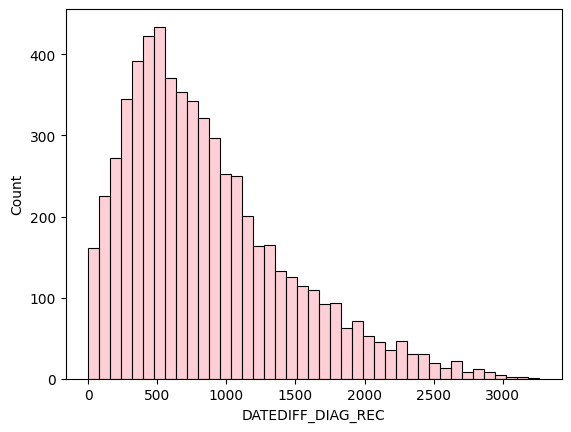

In [73]:
sns.histplot(df['DATEDIFF_DIAG_REC'].loc[df['DATEDIFF_DIAG_REC']>0], color='pink')

Mesmo com os outliers, é possível verificar que a mediana do tempo entre o diagnóstico e a última recidiva é de cerca de 500 dias após o diagnóstico, podendo chegar a mais de 1500 dias (cerca de 4 anos). A distribuição é bastante direcionada para a direita.

## Pré-processamento

### Retirando espaços desnecessários do começo e do final das colunas

In [74]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

### Substituindo todas as strings vazias por NaN

In [75]:
df.replace('', np.nan, inplace=True)

### Retirando dados onde a data do diagnóstico é menor do que a data da recidiva

In [76]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2,REC,DATEDIFF_DIAG_REC
0,9,38,2,SP,SP,3543402,RIBEIRAO PRETO,2,2017-12-06,24,...,NaN,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON,1,1,0,NaN
1,9,46,2,MG,SP,3524402,JACAREI,2,2017-10-06,33,...,NaN,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON,1,1,0,NaN
2,9,45,2,SP,SP,3548500,SANTOS,2,2019-03-20,24,...,NaN,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia,1,1,0,NaN
3,9,43,2,SP,SP,3543402,RIBEIRAO PRETO,2,2019-02-12,24,...,NaN,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON,1,1,0,NaN
4,5,67,2,SP,SP,3548500,SANTOS,1,2019-07-02,31,...,NaN,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia,1,1,0,NaN


In [77]:
filtro_data = (df['DTRECIDIVA'] > df['DTDIAG']) | df['DTRECIDIVA'].isna()

In [78]:
df = df[filtro_data]

In [79]:
df.REC.value_counts()

0    48047
1     6100
Name: REC, dtype: int64

### Retirando casos de óbito

In [80]:
df.NAOTRAT.value_counts()

8    52884
7      608
2      259
5      163
4      107
3       67
1       33
6       26
Name: NAOTRAT, dtype: int64

In [81]:
filtro_naotrat = ~df['NAOTRAT'].isin([2, 5, 6])

In [82]:
df = df[filtro_naotrat]

In [83]:
df.NAOTRAT.value_counts()

8    52884
7      608
4      107
3       67
1       33
Name: NAOTRAT, dtype: int64

In [84]:
df.REC.value_counts()

0    47602
1     6097
Name: REC, dtype: int64

### Retirando colunas que não se aplicam a câncer de mama

In [85]:
un_columns = ['PSA', 'GLEASON', 'S', 'G', 'LOCALTNM', 'IDMITOTIC']

In [86]:
df.drop(columns=un_columns, inplace=True)

In [87]:
colunas_deletadas = all(coluna not in df.columns for coluna in un_columns)

if colunas_deletadas:
    print("As colunas foram deletadas com sucesso.")
else:
    print("As colunas não foram deletadas corretamente.")

As colunas foram deletadas com sucesso.


### Retirando colunas que apenas informam que o paciente tem câncer de mama
Essas coluna não adiciona nenhuma informação nova, visto que todos os pacientes desse dataset já foram filtrados para câncer de mama

In [88]:
un_columns = ['TOPOGRUP']

In [89]:
df.drop(columns=un_columns, inplace=True)

In [90]:
colunas_deletadas = all(coluna not in df.columns for coluna in un_columns)

if colunas_deletadas:
    print("As colunas foram deletadas com sucesso.")
else:
    print("As colunas não foram deletadas corretamente.")

As colunas foram deletadas com sucesso.


### Retirando registros para câncer de mama masculino




In [91]:
df = df.loc[df['SEXO']==2]

In [92]:
df.REC.value_counts()

0    47272
1     6061
Name: REC, dtype: int64

In [93]:
df.drop(columns='SEXO', inplace=True)

### Retirando colunas que explicitamente informam que o paciente tem algum tipo de recidiva

In [94]:
data_leakage_columns = ['RECNENHUM', 'RECLOCAL', 'RECREGIO', 'RECDIST', 'REC01', 'REC02', 'REC03', 'REC04',
                        'META01', 'META02', 'META03', 'META04', 'DTRECIDIVA', 'DATEDIFF_DIAG_REC'
                        ]

In [95]:
df.drop(columns=data_leakage_columns, inplace=True)

In [96]:
colunas_deletadas = all(coluna not in df.columns for coluna in data_leakage_columns)

if colunas_deletadas:
    print("As colunas foram deletadas com sucesso.")
else:
    print("As colunas não foram deletadas corretamente.")

As colunas foram deletadas com sucesso.


In [97]:
df.shape

(53333, 79)

In [98]:
df.columns

Index(['ESCOLARI', 'IDADE', 'UFNASC', 'UFRESID', 'IBGE', 'CIDADE', 'CATEATEND',
       'DTCONSULT', 'CLINICA', 'DIAGPREV', 'DTDIAG', 'BASEDIAG', 'TOPO',
       'DESCTOPO', 'MORFO', 'DESCMORFO', 'EC', 'ECGRUP', 'T', 'N', 'M', 'PT',
       'PN', 'PM', 'OUTRACLA', 'DTTRAT', 'NAOTRAT', 'TRATAMENTO', 'TRATHOSP',
       'TRATFANTES', 'TRATFAPOS', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO',
       'HORMONIO', 'TMO', 'IMUNO', 'OUTROS', 'NENHUMANT', 'CIRURANT',
       'RADIOANT', 'QUIMIOANT', 'HORMOANT', 'TMOANT', 'IMUNOANT', 'OUTROANT',
       'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS',
       'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'DTULTINFO', 'ULTINFO', 'CONSDIAG',
       'TRATCONS', 'DIAGTRAT', 'ANODIAG', 'CICI', 'CICIGRUP', 'CICISUBGRU',
       'FAIXAETAR', 'LATERALI', 'INSTORIG', 'DRS', 'RRAS', 'PERDASEG', 'ERRO',
       'IBGEATEN', 'CIDO', 'DSCCIDO', 'HABILIT', 'HABIT11', 'HABILIT1',
       'HABILIT2', 'REC'],
      dtype='object')

### Removendo colunas de data

As colunas DTCONSULT, DTTRATAMENTO não serão utilizadas no formato de data. Esses dados serão mantidos na forma de delta entre diferentes datas, conservados nas variáveis CONSDIAG, TRATCONS, DIAGTRAT

In [99]:
date_columns = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'ULTINFO', 'DTULTINFO']

In [100]:
df['DTTRAT']

0        ********
1        20200604
2        20190402
3        20190221
4        20190813
           ...   
54212    20191007
54213    20190311
54214    20171113
54215    20200806
54216    20180509
Name: DTTRAT, Length: 53333, dtype: object

SE DTTRAT não existir, TRATCONS e DIAGTRAT serão nulos. Vamos criar uma flag para salvar essa informação antes de deletar a coluna

In [101]:
dttrat_column = ['DTTRAT']
df[dttrat_column] = df[dttrat_column].replace('********', np.nan)

In [102]:
df['NAOTRAT'] = df['DTTRAT'].isna().astype(int)

In [103]:
df.drop(columns=date_columns, inplace=True)

In [104]:
colunas_deletadas = all(coluna not in df.columns for coluna in date_columns)

if colunas_deletadas:
    print("As colunas foram deletadas com sucesso.")
else:
    print("As colunas não foram deletadas corretamente.")

As colunas foram deletadas com sucesso.


In [105]:
df.shape

(53333, 74)

In [106]:
df.columns

Index(['ESCOLARI', 'IDADE', 'UFNASC', 'UFRESID', 'IBGE', 'CIDADE', 'CATEATEND',
       'CLINICA', 'DIAGPREV', 'BASEDIAG', 'TOPO', 'DESCTOPO', 'MORFO',
       'DESCMORFO', 'EC', 'ECGRUP', 'T', 'N', 'M', 'PT', 'PN', 'PM',
       'OUTRACLA', 'NAOTRAT', 'TRATAMENTO', 'TRATHOSP', 'TRATFANTES',
       'TRATFAPOS', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO',
       'IMUNO', 'OUTROS', 'NENHUMANT', 'CIRURANT', 'RADIOANT', 'QUIMIOANT',
       'HORMOANT', 'TMOANT', 'IMUNOANT', 'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS',
       'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS',
       'OUTROAPOS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG', 'CICI',
       'CICIGRUP', 'CICISUBGRU', 'FAIXAETAR', 'LATERALI', 'INSTORIG', 'DRS',
       'RRAS', 'PERDASEG', 'ERRO', 'IBGEATEN', 'CIDO', 'DSCCIDO', 'HABILIT',
       'HABIT11', 'HABILIT1', 'HABILIT2', 'REC'],
      dtype='object')

### Removendo colunas repetidas ou que a informação já está contida em outras colunas

In [107]:
repeated_columns = ['DESCMORFO', 'DESCTOPO', 'DSCCIDO', 'TRATAMENTO', 'TRATHOSP',
                    'ECGRUP', 'T', 'N', 'M', 'DRS', 'FAIXAETAR', 'PERDASEG',
                    'TRATFANTES', 'TRATFAPOS', 'OUTRACLA', 'CIDO']

In [108]:
df.drop(columns=repeated_columns, inplace=True)

In [109]:
colunas_deletadas = all(coluna not in df.columns for coluna in repeated_columns)

if colunas_deletadas:
    print("As colunas foram deletadas com sucesso.")
else:
    print("As colunas não foram deletadas corretamente.")

As colunas foram deletadas com sucesso.


In [110]:
df.shape

(53333, 58)

In [111]:
df.columns

Index(['ESCOLARI', 'IDADE', 'UFNASC', 'UFRESID', 'IBGE', 'CIDADE', 'CATEATEND',
       'CLINICA', 'DIAGPREV', 'BASEDIAG', 'TOPO', 'MORFO', 'EC', 'PT', 'PN',
       'PM', 'NAOTRAT', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO',
       'TMO', 'IMUNO', 'OUTROS', 'NENHUMANT', 'CIRURANT', 'RADIOANT',
       'QUIMIOANT', 'HORMOANT', 'TMOANT', 'IMUNOANT', 'OUTROANT', 'NENHUMAPOS',
       'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'TMOAPOS',
       'IMUNOAPOS', 'OUTROAPOS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG',
       'CICI', 'CICIGRUP', 'CICISUBGRU', 'LATERALI', 'INSTORIG', 'RRAS',
       'ERRO', 'IBGEATEN', 'HABILIT', 'HABIT11', 'HABILIT1', 'HABILIT2',
       'REC'],
      dtype='object')

In [112]:
df.head()

,ESCOLARI,IDADE,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,...,LATERALI,INSTORIG,RRAS,ERRO,IBGEATEN,HABILIT,HABIT11,HABILIT1,HABILIT2,REC
0,9,38,SP,SP,3543402,RIBEIRAO PRETO,2,24,2,3,...,1,NaN,13,0,3543402,1,UNACON,1,1,0
1,9,46,MG,SP,3524402,JACAREI,2,33,2,1,...,1,NaN,17,0,3524402,1,UNACON,1,1,0
2,9,45,SP,SP,3548500,SANTOS,2,24,2,3,...,1,NaN,7,0,3548500,2,UNACON com Servio de Radioterapia,1,1,0
3,9,43,SP,SP,3543402,RIBEIRAO PRETO,2,24,2,3,...,1,NaN,13,0,3543402,1,UNACON,1,1,0
4,5,67,SP,SP,3548500,SANTOS,1,31,1,3,...,1,NaN,7,0,3548500,2,UNACON com Servio de Radioterapia,1,1,0


### Filtrando dados para adultos e removendo variáveis relacionadas a oncologia infantil

In [113]:
df = df.loc[df['IDADE']>=18]

In [114]:
df['IDADE'].describe()

count    53327.000000
mean        56.165357
std         13.390439
min         18.000000
25%         46.000000
50%         56.000000
75%         65.000000
max        103.000000
Name: IDADE, dtype: float64

In [115]:
infant_columns = ['CICI', 'CICIGRUP', 'CICISUBGRU']

In [116]:
df.drop(columns=infant_columns, inplace=True)

### Filtrando dados para pacientes residentes em SP e retirando variáveis referentes ao endereço (serão representadas na RRAS de atendimento)

In [117]:
df = df.loc[df['UFRESID']=='SP']

In [118]:
location_columns = ['UFNASC', 'UFRESID', 'IBGE',
                    'CIDADE', 'CLINICA', 'INSTORIG',
                    'ERRO', 'IBGEATEN',
                    'HABILIT1', 'HABIT11', 'HABILIT2']

In [119]:
df.drop(columns=location_columns, inplace=True)

<ipython-input-119-23ab4547e908>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=location_columns, inplace=True)


In [120]:
df.columns

Index(['ESCOLARI', 'IDADE', 'CATEATEND', 'DIAGPREV', 'BASEDIAG', 'TOPO',
       'MORFO', 'EC', 'PT', 'PN', 'PM', 'NAOTRAT', 'NENHUM', 'CIRURGIA',
       'RADIO', 'QUIMIO', 'HORMONIO', 'TMO', 'IMUNO', 'OUTROS', 'NENHUMANT',
       'CIRURANT', 'RADIOANT', 'QUIMIOANT', 'HORMOANT', 'TMOANT', 'IMUNOANT',
       'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS',
       'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'CONSDIAG',
       'TRATCONS', 'DIAGTRAT', 'ANODIAG', 'LATERALI', 'RRAS', 'HABILIT',
       'REC'],
      dtype='object')

In [121]:
df.shape

(50275, 44)

In [122]:
df.REC.value_counts(normalize=True)

0    0.886584
1    0.113416
Name: REC, dtype: float64

In [123]:
df.REC.value_counts()

0    44573
1     5702
Name: REC, dtype: int64

In [124]:
df.head()

,ESCOLARI,IDADE,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,...,IMUNOAPOS,OUTROAPOS,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,HABILIT,REC
0,9,38,2,2,3,C509,80001,Y,NaN,NaN,...,0,0,14,***,***,2017,1,13,1,0
1,9,46,2,2,1,C509,80001,Y,NaN,NaN,...,0,0,22,972,994,2017,1,17,1,0
2,9,45,2,2,3,C502,80001,Y,Y,Y,...,0,0,***,13,***,2016,1,7,2,0
3,9,43,2,2,3,C500,80001,Y,NaN,NaN,...,0,0,28,9,37,2019,1,13,1,0
4,5,67,1,1,3,C501,80001,Y,Y,Y,...,0,0,0,42,42,2019,1,7,2,0


In [125]:
df.ANODIAG.value_counts()

2014    9044
2015    8645
2016    8439
2018    8117
2019    8115
2017    7915
Name: ANODIAG, dtype: int64

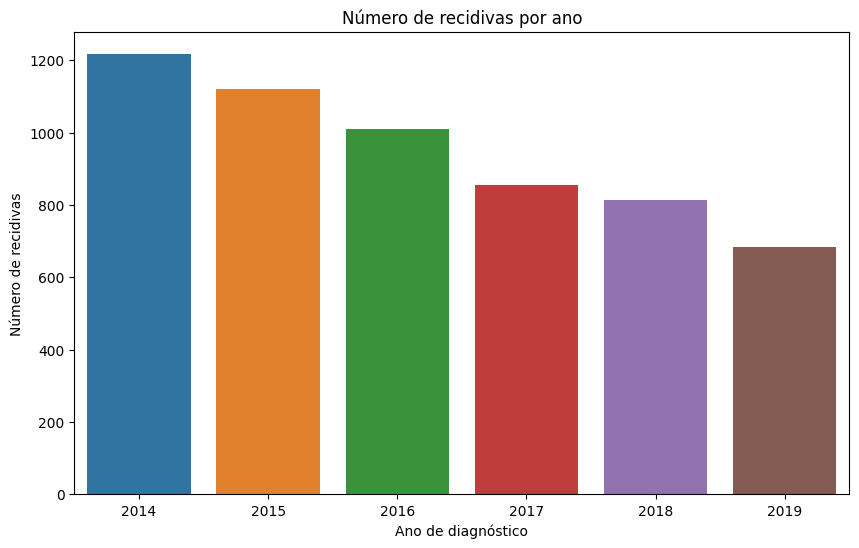

In [126]:
recurrence_counts = df.groupby('ANODIAG')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ANODIAG', y='REC', data=recurrence_counts)
plt.title('Número de recidivas por ano')
plt.xlabel('Ano de diagnóstico')
plt.ylabel('Número de recidivas')
plt.show()

<Figure size 1000x600 with 0 Axes>

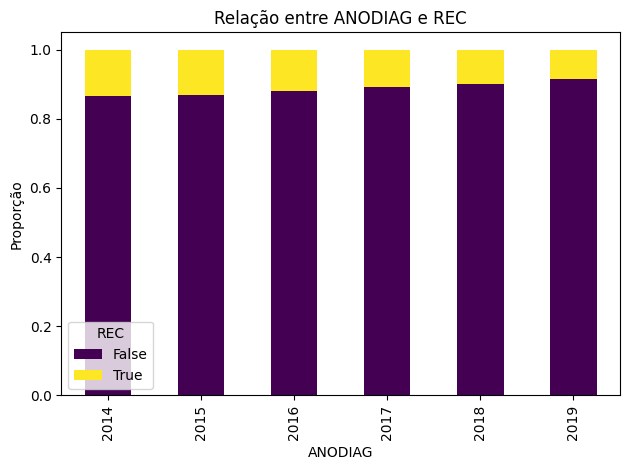

In [127]:
cross_tab = pd.crosstab(df['ANODIAG'], df['REC'], normalize='index')

plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('ANODIAG')
plt.ylabel('Proporção')
plt.title('Relação entre ANODIAG e REC')
plt.xticks(rotation=90)
plt.legend(title='REC', labels=['False', 'True'])
plt.tight_layout()
plt.show()

In [128]:
df.head()

,ESCOLARI,IDADE,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,...,IMUNOAPOS,OUTROAPOS,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,HABILIT,REC
0,9,38,2,2,3,C509,80001,Y,NaN,NaN,...,0,0,14,***,***,2017,1,13,1,0
1,9,46,2,2,1,C509,80001,Y,NaN,NaN,...,0,0,22,972,994,2017,1,17,1,0
2,9,45,2,2,3,C502,80001,Y,Y,Y,...,0,0,***,13,***,2016,1,7,2,0
3,9,43,2,2,3,C500,80001,Y,NaN,NaN,...,0,0,28,9,37,2019,1,13,1,0
4,5,67,1,1,3,C501,80001,Y,Y,Y,...,0,0,0,42,42,2019,1,7,2,0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50275 entries, 0 to 54216
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESCOLARI    50275 non-null  int64 
 1   IDADE       50275 non-null  int64 
 2   CATEATEND   50275 non-null  int64 
 3   DIAGPREV    50275 non-null  int64 
 4   BASEDIAG    50275 non-null  int64 
 5   TOPO        50275 non-null  object
 6   MORFO       50275 non-null  int64 
 7   EC          50275 non-null  object
 8   PT          21153 non-null  object
 9   PN          20874 non-null  object
 10  PM          16814 non-null  object
 11  NAOTRAT     50275 non-null  int64 
 12  NENHUM      50275 non-null  int64 
 13  CIRURGIA    50275 non-null  int64 
 14  RADIO       50275 non-null  int64 
 15  QUIMIO      50275 non-null  int64 
 16  HORMONIO    50275 non-null  int64 
 17  TMO         50275 non-null  int64 
 18  IMUNO       50275 non-null  int64 
 19  OUTROS      50275 non-null  int64 
 20  NENHUM

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50275 entries, 0 to 54216
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESCOLARI    50275 non-null  int64 
 1   IDADE       50275 non-null  int64 
 2   CATEATEND   50275 non-null  int64 
 3   DIAGPREV    50275 non-null  int64 
 4   BASEDIAG    50275 non-null  int64 
 5   TOPO        50275 non-null  object
 6   MORFO       50275 non-null  int64 
 7   EC          50275 non-null  object
 8   PT          21153 non-null  object
 9   PN          20874 non-null  object
 10  PM          16814 non-null  object
 11  NAOTRAT     50275 non-null  int64 
 12  NENHUM      50275 non-null  int64 
 13  CIRURGIA    50275 non-null  int64 
 14  RADIO       50275 non-null  int64 
 15  QUIMIO      50275 non-null  int64 
 16  HORMONIO    50275 non-null  int64 
 17  TMO         50275 non-null  int64 
 18  IMUNO       50275 non-null  int64 
 19  OUTROS      50275 non-null  int64 
 20  NENHUM

### Dividindo dataset em treino e teste

In [131]:
#Primeiro, vamos converter as colunas categórias para o tipo correto
columns_to_convert = ['ESCOLARI', 'MORFO', 'CATEATEND', 'DIAGPREV', 'LATERALI', 'RRAS', 'HABILIT', 'EC', 'BASEDIAG']

# Use o método astype para converter as colunas para object
df[columns_to_convert] = df[columns_to_convert].astype(str)

In [132]:
train = deepcopy(df.loc[df['ANODIAG']<2018])
test = deepcopy(df.loc[df['ANODIAG']>=2018])

test_rec_0 = test[test['REC'] == 0]
test_rec_1 = test[test['REC'] == 1]

# Divida cada parte em 50% para criar o conjunto de validação 'val'
val_rec_0, test_rec_0 = train_test_split(test_rec_0, test_size=0.5, random_state=42)
val_rec_1, test_rec_1 = train_test_split(test_rec_1, test_size=0.5, random_state=42)

# Concatene as partes de 'val' e 'test' para criar os conjuntos 'val' e 'test' finais
val = pd.concat([val_rec_0, val_rec_1])
test = pd.concat([test_rec_0, test_rec_1])

# Verifique se a proporção da variável alvo 'REC' é semelhante em 'val' e 'test'
print("Proporção de 'REC' em val:")
print(val['REC'].value_counts(normalize=True))

print("Proporção de 'REC' em test:")
print(test['REC'].value_counts(normalize=True))

Proporção de 'REC' em val:
0    0.907825
1    0.092175
Name: REC, dtype: float64
Proporção de 'REC' em test:
0    0.907725
1    0.092275
Name: REC, dtype: float64


In [133]:
train.REC.value_counts()

0    29838
1     4205
Name: REC, dtype: int64

In [134]:
test.REC.value_counts()

0    7368
1     749
Name: REC, dtype: int64

In [135]:
val.REC.value_counts()

0    7367
1     748
Name: REC, dtype: int64

In [136]:
test.ANODIAG.value_counts()

2019    4075
2018    4042
Name: ANODIAG, dtype: int64

In [137]:
val.ANODIAG.value_counts()

2018    4075
2019    4040
Name: ANODIAG, dtype: int64

In [138]:
train.drop(columns='ANODIAG', inplace=True)
test.drop(columns='ANODIAG', inplace=True)
val.drop(columns='ANODIAG', inplace=True)

In [139]:
X_train = deepcopy(train.drop('REC', axis=1))
X_val = deepcopy(val.drop('REC', axis=1))
X_test = deepcopy(test.drop('REC', axis=1))

In [140]:
y_train = train.pop('REC')
y_test = test.pop('REC')
y_val = val.pop('REC')

### Valores nulos e missings - imputação

In [141]:
X_train.columns

Index(['ESCOLARI', 'IDADE', 'CATEATEND', 'DIAGPREV', 'BASEDIAG', 'TOPO',
       'MORFO', 'EC', 'PT', 'PN', 'PM', 'NAOTRAT', 'NENHUM', 'CIRURGIA',
       'RADIO', 'QUIMIO', 'HORMONIO', 'TMO', 'IMUNO', 'OUTROS', 'NENHUMANT',
       'CIRURANT', 'RADIOANT', 'QUIMIOANT', 'HORMOANT', 'TMOANT', 'IMUNOANT',
       'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS',
       'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'CONSDIAG',
       'TRATCONS', 'DIAGTRAT', 'LATERALI', 'RRAS', 'HABILIT'],
      dtype='object')

As colunas 'CONSDIAG', 'TRATCONS', 'DIAGTAT', representam a quantidade em dias entre a consulta e  diagnóstico, entre o tratamento e a consulta e entre o diagnóstico e o tratamento. Portanto, essas são colunas que representam números inteiros e não devem ser consideradas do tipo 'object'. Para converte-las para o tipo correto, precisamos converter os nulos (representados nessas colunas como '***') em valores representados como null/NA.

In [142]:
qnt_dias_columns = ['CONSDIAG', 'TRATCONS', 'DIAGTRAT']

X_train[qnt_dias_columns] = X_train[qnt_dias_columns].replace('***', '')

X_test[qnt_dias_columns] = X_test[qnt_dias_columns].replace('***', '')
X_val[qnt_dias_columns] = X_val[qnt_dias_columns].replace('***', '')

# Convert columns to numeric (int) type while handling empty strings
for col in qnt_dias_columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
    X_val[col] = pd.to_numeric(X_val[col], errors='coerce')

In [143]:
#Verificando colunas que tem pelo menos 1 valor null

colunas_com_nan = X_train.columns[X_train.isna().any()]

print("Colunas com pelo menos um valor NaN:")
for coluna in colunas_com_nan:
    print(coluna)

Colunas com pelo menos um valor NaN:
PT
PN
PM
CONSDIAG
TRATCONS
DIAGTRAT


TRATCONS e DIAGTRAT são nulls quando o paciente não recebeu tratamento. A variável NAOTRAT atua como uma flag para esses nulls, pois tem 1 se o paciente não recebeu tratamento. Vamos então inputar esses valores para remover esses nulos. Temos também uma variável chamada 'NENHUM', que teoricamente indica quando o paciente não tem nenhum tratamento. Vamos ver se elas não iguais

In [144]:
X_train['NAOPT'] = X_train['PT'].isna().astype(int)
X_test['NAOPT'] = X_test['PT'].isna().astype(int)
X_val['NAOPT'] = X_val['PT'].isna().astype(int)

X_train['NAOPM'] = X_train['PM'].isna().astype(int)
X_test['NAOPM'] = X_test['PM'].isna().astype(int)
X_val['NAOPM'] = X_val['PM'].isna().astype(int)

X_train['NAOPN'] = X_train['PN'].isna().astype(int)
X_test['NAOPN'] = X_test['PN'].isna().astype(int)
X_val['NAOPN'] = X_val['PN'].isna().astype(int)

In [145]:
for column in X_train.columns:
    print(f"Column '{column}' dtype: {X_train[column].dtype}")

Column 'ESCOLARI' dtype: object
Column 'IDADE' dtype: int64
Column 'CATEATEND' dtype: object
Column 'DIAGPREV' dtype: object
Column 'BASEDIAG' dtype: object
Column 'TOPO' dtype: object
Column 'MORFO' dtype: object
Column 'EC' dtype: object
Column 'PT' dtype: object
Column 'PN' dtype: object
Column 'PM' dtype: object
Column 'NAOTRAT' dtype: int64
Column 'NENHUM' dtype: int64
Column 'CIRURGIA' dtype: int64
Column 'RADIO' dtype: int64
Column 'QUIMIO' dtype: int64
Column 'HORMONIO' dtype: int64
Column 'TMO' dtype: int64
Column 'IMUNO' dtype: int64
Column 'OUTROS' dtype: int64
Column 'NENHUMANT' dtype: int64
Column 'CIRURANT' dtype: int64
Column 'RADIOANT' dtype: int64
Column 'QUIMIOANT' dtype: int64
Column 'HORMOANT' dtype: int64
Column 'TMOANT' dtype: int64
Column 'IMUNOANT' dtype: int64
Column 'OUTROANT' dtype: int64
Column 'NENHUMAPOS' dtype: int64
Column 'CIRURAPOS' dtype: int64
Column 'RADIOAPOS' dtype: int64
Column 'QUIMIOAPOS' dtype: int64
Column 'HORMOAPOS' dtype: int64
Column 'TMO

In [146]:
#Verificando quais colunas do dataset possuem tipo object
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['ESCOLARI',
 'CATEATEND',
 'DIAGPREV',
 'BASEDIAG',
 'TOPO',
 'MORFO',
 'EC',
 'PT',
 'PN',
 'PM',
 'LATERALI',
 'RRAS',
 'HABILIT']

In [147]:
imputer_object_cols = SimpleImputer(strategy='most_frequent')
imputed_X_train_object = pd.DataFrame(imputer_object_cols.fit_transform(X_train[object_cols]))
imputed_X_test_object = pd.DataFrame(imputer_object_cols.transform(X_test[object_cols]))
imputed_X_val_object = pd.DataFrame(imputer_object_cols.transform(X_val[object_cols]))

imputed_X_train_object.columns = X_train[object_cols].columns
imputed_X_train_object.index = X_train.index

imputed_X_test_object.columns = X_test[object_cols].columns
imputed_X_test_object.index = X_test.index

imputed_X_val_object.columns = X_val[object_cols].columns
imputed_X_val_object.index = X_val.index

In [148]:
imputed_X_train_object

,ESCOLARI,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,PM,LATERALI,RRAS,HABILIT
0,9,2,2,3,C509,80001,Y,2,0,0,1,13,1
1,9,2,2,1,C509,80001,Y,2,0,0,1,17,1
2,9,2,2,3,C502,80001,Y,Y,Y,Y,1,7,2
6,9,2,2,3,C509,80001,Y,2,0,0,2,13,1
7,4,2,2,3,C504,80003,Y,Y,Y,Y,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54207,9,2,1,3,C504,96993,Y,2,0,0,1,8,3
54210,9,2,2,3,C509,97143,Y,2,0,0,2,6,6
54214,9,2,2,3,C505,97283,Y,2,0,0,2,17,9
54215,9,2,2,2,C509,97401,Y,2,0,0,1,17,1


In [149]:
#Verificando quais colunas do dataset possuem tipo int
s = (X_train.dtypes == 'int')
int_cols = list(s[s].index)
int_cols

['IDADE',
 'NAOTRAT',
 'NENHUM',
 'CIRURGIA',
 'RADIO',
 'QUIMIO',
 'HORMONIO',
 'TMO',
 'IMUNO',
 'OUTROS',
 'NENHUMANT',
 'CIRURANT',
 'RADIOANT',
 'QUIMIOANT',
 'HORMOANT',
 'TMOANT',
 'IMUNOANT',
 'OUTROANT',
 'NENHUMAPOS',
 'CIRURAPOS',
 'RADIOAPOS',
 'QUIMIOAPOS',
 'HORMOAPOS',
 'TMOAPOS',
 'IMUNOAPOS',
 'OUTROAPOS',
 'NAOPT',
 'NAOPM',
 'NAOPN']

In [150]:
imputer_int_cols = SimpleImputer(strategy='median')
imputed_X_train_int = pd.DataFrame(imputer_int_cols.fit_transform(X_train[int_cols]))
imputed_X_test_int = pd.DataFrame(imputer_int_cols.transform(X_test[int_cols]))
imputed_X_val_int = pd.DataFrame(imputer_int_cols.transform(X_val[int_cols]))

imputed_X_train_int.columns = X_train[int_cols].columns
imputed_X_train_int.index = X_train.index


imputed_X_test_int.columns = X_test[int_cols].columns
imputed_X_test_int.index = X_test.index

imputed_X_val_int.columns = X_val[int_cols].columns
imputed_X_val_int.index = X_val.index

In [151]:
imputed_X_train_int = imputed_X_train_int.astype(int)
imputed_X_test_int = imputed_X_test_int.astype(int)
imputed_X_val_int = imputed_X_val_int.astype(int)


In [152]:
imputed_X_train_int

,IDADE,NAOTRAT,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,...,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,NAOPT,NAOPM,NAOPN
0,38,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,46,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,45,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,75,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
7,27,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54207,67,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
54210,51,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
54214,48,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
54215,47,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [153]:
# Juntando os datasets novamente
imputed_X_train = pd.concat([imputed_X_train_object, imputed_X_train_int], axis=1)
imputed_X_test = pd.concat([imputed_X_test_object, imputed_X_test_int], axis=1)
imputed_X_val = pd.concat([imputed_X_val_object, imputed_X_val_int], axis=1)

In [154]:
imputed_X_train.columns

Index(['ESCOLARI', 'CATEATEND', 'DIAGPREV', 'BASEDIAG', 'TOPO', 'MORFO', 'EC',
       'PT', 'PN', 'PM', 'LATERALI', 'RRAS', 'HABILIT', 'IDADE', 'NAOTRAT',
       'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO', 'IMUNO',
       'OUTROS', 'NENHUMANT', 'CIRURANT', 'RADIOANT', 'QUIMIOANT', 'HORMOANT',
       'TMOANT', 'IMUNOANT', 'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS',
       'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS',
       'OUTROAPOS', 'NAOPT', 'NAOPM', 'NAOPN'],
      dtype='object')

In [155]:
imputed_X_train.head()

,ESCOLARI,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,PM,...,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,NAOPT,NAOPM,NAOPN
0,9,2,2,3,C509,80001,Y,2,0,0,...,0,0,0,0,0,0,0,1,1,1
1,9,2,2,1,C509,80001,Y,2,0,0,...,0,0,0,0,0,0,0,1,1,1
2,9,2,2,3,C502,80001,Y,Y,Y,Y,...,1,0,0,0,0,0,0,0,0,0
6,9,2,2,3,C509,80001,Y,2,0,0,...,0,0,0,0,0,0,0,1,1,1
7,4,2,2,3,C504,80003,Y,Y,Y,Y,...,0,0,0,0,0,0,0,0,0,0


In [156]:
X_train.head()

,ESCOLARI,IDADE,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,...,OUTROAPOS,CONSDIAG,TRATCONS,DIAGTRAT,LATERALI,RRAS,HABILIT,NAOPT,NAOPM,NAOPN
0,9,38,2,2,3,C509,80001,Y,NaN,NaN,...,0,14.0,NaN,NaN,1,13,1,1,1,1
1,9,46,2,2,1,C509,80001,Y,NaN,NaN,...,0,22.0,972.0,994.0,1,17,1,1,1,1
2,9,45,2,2,3,C502,80001,Y,Y,Y,...,0,NaN,13.0,NaN,1,7,2,0,0,0
6,9,75,2,2,3,C509,80001,Y,NaN,NaN,...,0,53.0,0.0,53.0,2,13,1,1,1,1
7,4,27,2,2,3,C504,80003,Y,Y,Y,...,0,64.0,21.0,85.0,1,7,2,0,0,0


In [157]:
#Verificando se restam nulls

colunas_com_nan = imputed_X_train.columns[imputed_X_train.isna().any()]

print("Colunas com pelo menos um valor NaN:")
for coluna in colunas_com_nan:
    print(coluna)

Colunas com pelo menos um valor NaN:


### Target-encoding

Será realizado o Target-Encoding de todas as variáveis categóricas com o objetivo de reduzir a dimensionalidade

In [158]:
X_encode = imputed_X_train.sample(frac=0.20, random_state=0)
y_encode = y_train.loc[X_encode.index]

# Training split
X_pretrain = imputed_X_train.drop(X_encode.index)
y_train = y_train.loc[X_pretrain.index]

In [159]:
y_encode.value_counts()

0    5983
1     826
Name: REC, dtype: int64

In [160]:
y_train.value_counts()

0    23855
1     3379
Name: REC, dtype: int64

In [161]:
#Selecionando as colunas do tipo object para aplicar o encoding
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['ESCOLARI',
 'CATEATEND',
 'DIAGPREV',
 'BASEDIAG',
 'TOPO',
 'MORFO',
 'EC',
 'PT',
 'PN',
 'PM',
 'LATERALI',
 'RRAS',
 'HABILIT']

In [162]:
encoder = MEstimateEncoder(cols=object_cols,m=2)


# Fit the encoder on the encoding split
encoder.fit(X_encode, y_encode)

# Encode the training split
encoded_X_train = encoder.transform(X_pretrain)

#Encoding the val and test
encoded_X_val = encoder.transform(imputed_X_val)
encoded_X_test = encoder.transform(imputed_X_test)

In [163]:
encoded_X_train

,ESCOLARI,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,PM,...,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,NAOPT,NAOPM,NAOPN
0,0.122593,0.140707,0.119980,0.121987,0.107476,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
1,0.122593,0.140707,0.119980,0.026958,0.107476,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
2,0.122593,0.140707,0.119980,0.121987,0.101092,0.121310,0.129333,0.140164,0.140164,0.149508,...,1,0,0,0,0,0,0,0,0,0
6,0.122593,0.140707,0.119980,0.121987,0.107476,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
9,0.122593,0.140707,0.119980,0.121987,0.107476,0.015164,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54201,0.135270,0.140707,0.119980,0.121987,0.121951,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
54205,0.075240,0.043567,0.119980,0.121987,0.121951,0.121310,0.129333,0.140164,0.140164,0.149508,...,0,0,0,0,0,0,0,0,0,0
54207,0.122593,0.140707,0.123102,0.121987,0.121951,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
54214,0.122593,0.140707,0.119980,0.121987,0.155423,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1


In [164]:
encoded_X_val

,ESCOLARI,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,PM,...,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,NAOPT,NAOPM,NAOPN
49921,0.135270,0.140707,0.119980,0.121987,0.079021,0.036764,0.026320,0.139951,0.115427,0.121289,...,0,1,0,0,0,0,0,1,1,1
10483,0.122593,0.043567,0.123102,0.121987,0.122141,0.146013,0.063082,0.063618,0.107307,0.121289,...,0,0,0,0,0,0,0,0,0,0
8025,0.075240,0.140707,0.123102,0.121987,0.121951,0.015887,0.019972,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
53530,0.135270,0.140707,0.119980,0.121987,0.122141,0.089705,0.186542,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
48422,0.122593,0.043567,0.123102,0.121987,0.155423,0.126213,0.026320,0.042265,0.115427,0.121289,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39472,0.100201,0.140707,0.119980,0.121987,0.107476,0.146013,0.321738,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
46590,0.135270,0.140707,0.119980,0.121987,0.121951,0.018663,0.019972,0.045289,0.115427,0.121289,...,0,1,0,0,0,0,0,0,1,0
29851,0.153221,0.140707,0.119980,0.121987,0.122141,0.146013,0.294989,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
53729,0.135270,0.140707,0.119980,0.121987,0.121951,0.249705,0.136923,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1


In [165]:
encoded_X_test

,ESCOLARI,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,PM,...,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,NAOPT,NAOPM,NAOPN
24110,0.122593,0.140707,0.123102,0.121987,0.122141,0.146013,0.026320,0.063618,0.115427,0.121289,...,0,0,0,0,0,0,0,0,0,0
28090,0.075240,0.043567,0.119980,0.121987,0.101092,0.146013,0.026320,0.042265,0.115427,0.121289,...,0,0,0,0,0,0,0,0,0,0
35734,0.153221,0.140707,0.123102,0.121987,0.101092,0.146013,0.026320,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
29348,0.101931,0.140707,0.123102,0.121987,0.101092,0.146013,0.063082,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
24520,0.153221,0.140707,0.119980,0.026958,0.121951,0.146013,0.026320,0.098487,0.115427,0.121289,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9551,0.135270,0.140707,0.123102,0.121987,0.122141,0.146013,0.294989,0.045289,0.115427,0.121289,...,0,0,0,0,0,0,0,0,0,0
16757,0.101931,0.140707,0.123102,0.121987,0.107476,0.146013,0.063082,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
8837,0.100201,0.140707,0.123102,0.121987,0.121951,0.015887,0.019972,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
53786,0.135270,0.140707,0.119980,0.121987,0.122141,0.249705,0.136923,0.139951,0.115427,0.121289,...,0,1,0,0,0,0,0,1,1,1


### Aplicando Standard Scaler

In [166]:
encoded_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27234 entries, 0 to 54215
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESCOLARI    27234 non-null  float64
 1   CATEATEND   27234 non-null  float64
 2   DIAGPREV    27234 non-null  float64
 3   BASEDIAG    27234 non-null  float64
 4   TOPO        27234 non-null  float64
 5   MORFO       27234 non-null  float64
 6   EC          27234 non-null  float64
 7   PT          27234 non-null  float64
 8   PN          27234 non-null  float64
 9   PM          27234 non-null  float64
 10  LATERALI    27234 non-null  float64
 11  RRAS        27234 non-null  float64
 12  HABILIT     27234 non-null  float64
 13  IDADE       27234 non-null  int64  
 14  NAOTRAT     27234 non-null  int64  
 15  NENHUM      27234 non-null  int64  
 16  CIRURGIA    27234 non-null  int64  
 17  RADIO       27234 non-null  int64  
 18  QUIMIO      27234 non-null  int64  
 19  HORMONIO    27234 non-nul

<Axes: xlabel='IDADE', ylabel='Count'>

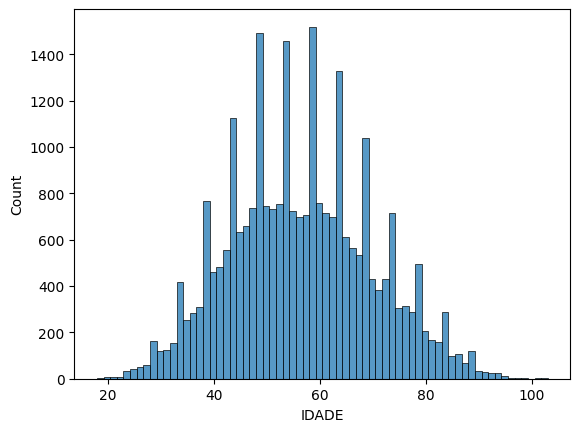

In [167]:
sns.histplot(encoded_X_train.IDADE)

In [168]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling only to the selected columns
encoded_X_train['IDADE'] = scaler.fit_transform(encoded_X_train[['IDADE']])
encoded_X_test['IDADE'] = scaler.transform(encoded_X_test[['IDADE']])
encoded_X_val['IDADE'] = scaler.transform(encoded_X_val[['IDADE']])

In [169]:
encoded_X_train

,ESCOLARI,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,PM,...,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,NAOPT,NAOPM,NAOPN
0,0.122593,0.140707,0.119980,0.121987,0.107476,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
1,0.122593,0.140707,0.119980,0.026958,0.107476,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
2,0.122593,0.140707,0.119980,0.121987,0.101092,0.121310,0.129333,0.140164,0.140164,0.149508,...,1,0,0,0,0,0,0,0,0,0
6,0.122593,0.140707,0.119980,0.121987,0.107476,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
9,0.122593,0.140707,0.119980,0.121987,0.107476,0.015164,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54201,0.135270,0.140707,0.119980,0.121987,0.121951,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
54205,0.075240,0.043567,0.119980,0.121987,0.121951,0.121310,0.129333,0.140164,0.140164,0.149508,...,0,0,0,0,0,0,0,0,0,0
54207,0.122593,0.140707,0.123102,0.121987,0.121951,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1
54214,0.122593,0.140707,0.119980,0.121987,0.155423,0.121310,0.129333,0.139951,0.115427,0.121289,...,0,0,0,0,0,0,0,1,1,1


## Testando diferentes modelos

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.04224
0:	learn: 0.6532491	total: 9.51ms	remaining: 9.5s
1:	learn: 0.6199173	total: 21.6ms	remaining: 10.8s
2:	learn: 0.5883041	total: 40.3ms	remaining: 13.4s
3:	learn: 0.5593314	total: 48.9ms	remaining: 12.2s
4:	learn: 0.5341245	total: 61ms	remaining: 12.1s
5:	learn: 0.5131001	total: 70.3ms	remaining: 11.6s
6:	learn: 0.4943632	total: 80ms	remaining: 11.4s
7:	learn: 0.4765769	total: 89.2ms	remaining: 11.1s
8:	learn: 0.4603392	total: 99ms	remaining: 10.9s
9:	learn: 0.4470626	total: 109ms	remaining: 10.8s
10:	learn: 0.4338841	total: 118ms	remaining: 10.6s
11:	learn: 0.4232463	total: 126ms	remaining: 10.3s
12:	learn: 0.4145314	total: 135ms	remaining: 10.3s
13:	learn: 0.4057462	total: 144ms	remaining: 10.1s
14:	learn: 0.3973222	total: 154ms	remaining: 10.1s
15:	learn: 0.3903450	total: 170ms	remaining: 10.4s
16:	learn: 0.3827183	total: 178ms	remaining: 10.3s
17:	learn: 0.3769000	total: 188ms	remaining: 10.2s
18:	learn: 0.3716244	total: 202ms	remaining: 10.4s
19:	learn:

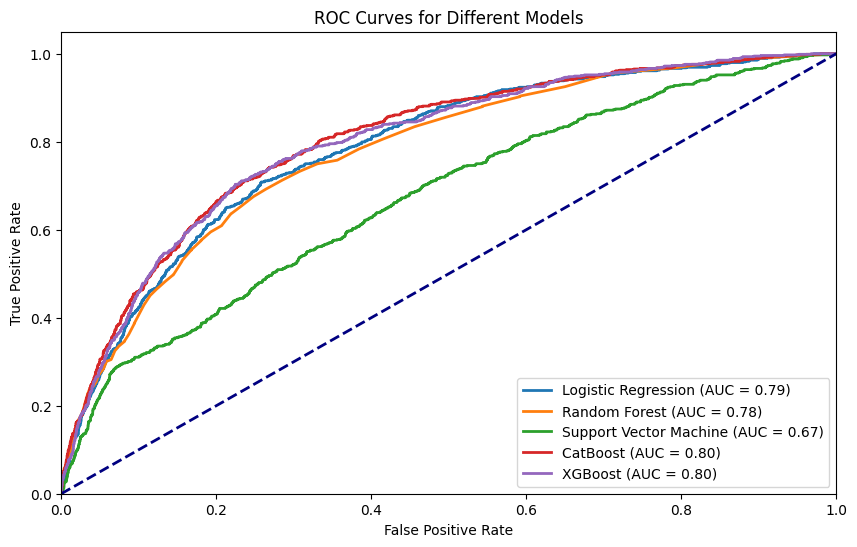

In [171]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True)),
    ('CatBoost', CatBoostClassifier()),  # Add CatBoost
    ('XGBoost', xgb.XGBClassifier())     # Add XGBoost
]

# Initialize lists to store model names and metrics
model_names = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize a figure for plotting ROC curves
plt.figure(figsize=(10, 6))

# Iterate through classifiers
for name, classifier in classifiers:
    # Fit the classifier on the training data
    classifier.fit(encoded_X_train, y_train)

    # Predict probabilities for the validation data
    y_val_pred_prob = classifier.predict_proba(encoded_X_val)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)

    # Calculate AUC
    auc_score = auc(fpr, tpr)

    # Calculate precision, recall, and F1-score
    y_val_pred = classifier.predict(encoded_X_val)
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_val_pred, average='binary')

    # Store model name and metrics
    model_names.append(name)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc_score:.2f})')

# Set labels and legend
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")

# Display precision, recall, and F1-score for each model
for i in range(len(model_names)):
    print(f"Model: {model_names[i]}")
    print(f"Precision: {precision_scores[i]:.2f}")
    print(f"Recall: {recall_scores[i]:.2f}")
    print(f"F1-score: {f1_scores[i]:.2f}")
    print()

# Show the plot
plt.show()